In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 

In [3]:
match = pd.read_csv('Match.csv')
player = pd.read_csv('Player.csv')
stats = pd.read_csv('Stats.csv')
player['count'] = 0
match_results = pd.DataFrame()


In [4]:
match.head()

,match_id,round,date,avg_minutes_game,avg_seconds_point,avg_minutes_set,tournament,year,match_minutes
0,m_2019_A_0,1st Round,2019-01-14,4.81,46.8,43.3,Australian Open,2019,173.0
1,m_2019_A_1,1st Round,2019-01-14,3.95,35.7,40.5,Australian Open,2019,162.0
2,m_2019_A_2,1st Round,2019-01-14,4.86,42.3,43.8,Australian Open,2019,175.0
3,m_2019_A_3,1st Round,2019-01-14,4.43,43.3,41.0,Australian Open,2019,164.0
4,m_2019_A_4,1st Round,2019-01-14,4.37,39.7,43.7,Australian Open,2019,131.0


In [5]:
stats.head()

,match_id,player_id,pts,rank,winner,sets,1,2,3,4,...,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per
0,m_2019_A_0,atp_104731,4810.0,6.0,True,3.0,6.0,5.0,6.0,6.0,...,73.0,51.0,14.0,5.0,7.0,29.0,22.0,71.0,5.0,0.645455
1,m_2019_A_1,atp_105932,1820.0,20.0,True,3.0,6.0,4.0,7.0,6.0,...,92.0,50.0,11.0,10.0,15.0,17.0,33.0,90.0,9.0,0.620690
2,m_2019_A_2,atp_105430,585.0,98.0,True,3.0,3.0,6.0,6.0,6.0,...,73.0,59.0,10.0,8.0,13.0,27.0,32.0,90.0,1.0,0.720000
3,m_2019_A_3,atp_105882,401.0,137.0,True,3.0,6.0,6.0,6.0,6.0,...,82.0,45.0,23.0,5.0,6.0,16.0,29.0,63.0,3.0,0.543103
4,m_2019_A_4,atp_104269,1410.0,28.0,True,3.0,7.0,6.0,6.0,NaN,...,63.0,47.0,21.0,1.0,2.0,29.0,18.0,58.0,6.0,0.666667


In [6]:
player.head()

,player_id,fullname,hand,country,birthday,count
0,atp_100001,Gardnar Mulloy,R,USA,1913-11-22,0
1,atp_100003,Frank Sedgman,R,AUS,1927-10-02,0
2,atp_100004,Giuseppe Merlo,R,ITA,1927-10-11,0
3,atp_100005,Richard Pancho Gonzales,R,USA,1928-05-09,0
4,atp_100006,Grant Golden,R,USA,1929-08-21,0


In [7]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10160 entries, 0 to 10159
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           10160 non-null  object 
 1   round              10160 non-null  object 
 2   date               10160 non-null  object 
 3   avg_minutes_game   10114 non-null  float64
 4   avg_seconds_point  10115 non-null  float64
 5   avg_minutes_set    10078 non-null  float64
 6   tournament         10160 non-null  object 
 7   year               10160 non-null  int64  
 8   match_minutes      10117 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 714.5+ KB


In [8]:
wim_matches = match[match["tournament"]=='Wimbledon']

In [9]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   pts                   14398 non-null  float64
 3   rank                  20230 non-null  float64
 4   winner                20240 non-null  bool   
 5   sets                  20236 non-null  float64
 6   1                     20236 non-null  float64
 7   2                     20107 non-null  float64
 8   3                     19818 non-null  float64
 9   4                     9898 non-null   float64
 10  5                     3724 non-null   float64
 11  avg_odds              9852 non-null   float64
 12  max_odds              9852 non-null   float64
 13  total_pts             20234 non-null  float64
 14  service_pts           20234 non-null  float64
 15  return_pts         

In [10]:
merge_match_stats = pd.merge(left=wim_matches, right=stats, left_on='match_id', right_on='match_id')

In [11]:
merge_match_stats[["match_id","player_id","winner","tournament","sets","year"]]

,match_id,player_id,winner,tournament,sets,year
0,m_2019_W_0,atp_104386,True,Wimbledon,3.0,2019
1,m_2019_W_0,atp_106415,False,Wimbledon,2.0,2019
2,m_2019_W_1,atp_104731,True,Wimbledon,3.0,2019
3,m_2019_W_1,atp_105732,False,Wimbledon,0.0,2019
4,m_2019_W_2,atp_103852,True,Wimbledon,3.0,2019
...,...,...,...,...,...,...
5063,m_2000_W_124,atp_101736,False,Wimbledon,2.0,2000
5064,m_2000_W_125,atp_101948,True,Wimbledon,3.0,2000
5065,m_2000_W_125,atp_103166,False,Wimbledon,0.0,2000
5066,m_2000_W_126,atp_101948,True,Wimbledon,3.0,2000


In [12]:
merge_player = pd.merge(left=merge_match_stats, right=player, left_on='player_id', right_on='player_id')

In [13]:
merge_player[["match_id","player_id","fullname","winner","country","tournament","sets","date","year","count"]]

,match_id,player_id,fullname,winner,country,tournament,sets,date,year,count
0,m_2019_W_0,atp_104386,Janko Tipsarevic,True,SRB,Wimbledon,3.0,2019-01-07,2019,0
1,m_2019_W_78,atp_104386,Janko Tipsarevic,False,SRB,Wimbledon,1.0,2019-03-07,2019,0
2,m_2017_W_62,atp_104386,Janko Tipsarevic,False,SRB,Wimbledon,0.0,2017-04-07,2017,0
3,m_2016_W_10,atp_104386,Janko Tipsarevic,False,SRB,Wimbledon,1.0,2016-06-27,2016,0
4,m_2015_W_4,atp_104386,Janko Tipsarevic,False,SRB,Wimbledon,0.0,2015-06-29,2015,0
...,...,...,...,...,...,...,...,...,...,...
5063,m_2000_W_75,atp_101543,Jeff Tarango,False,USA,Wimbledon,2.0,2000-06-26,2000,0
5064,m_2000_W_60,atp_102133,Laurence Tieleman,False,ITA,Wimbledon,1.0,2000-06-26,2000,0
5065,m_2000_W_61,atp_102652,Christian Vinck,True,GER,Wimbledon,3.0,2000-06-26,2000,0
5066,m_2000_W_94,atp_102652,Christian Vinck,True,GER,Wimbledon,3.0,2000-06-26,2000,0


In [14]:
merge_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 0 to 5067
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              5068 non-null   object 
 1   round                 5068 non-null   object 
 2   date                  5068 non-null   object 
 3   avg_minutes_game      5064 non-null   float64
 4   avg_seconds_point     5064 non-null   float64
 5   avg_minutes_set       5044 non-null   float64
 6   tournament            5068 non-null   object 
 7   year                  5068 non-null   int64  
 8   match_minutes         5064 non-null   float64
 9   player_id             5068 non-null   object 
 10  pts                   3544 non-null   float64
 11  rank                  5068 non-null   float64
 12  winner                5068 non-null   bool   
 13  sets                  5066 non-null   float64
 14  1                     5066 non-null   float64
 15  2                    

In [15]:
merge_player_w = merge_player[merge_player.winner==True]
merge_player_l = merge_player[merge_player.winner==False]

In [16]:
wim_win = merge_player_w[['tournament','fullname','count']]
wim_lose = merge_player_l[['tournament','fullname','count']]

In [17]:
wim_win

,tournament,fullname,count
0,Wimbledon,Janko Tipsarevic,0
6,Wimbledon,Janko Tipsarevic,0
7,Wimbledon,Janko Tipsarevic,0
11,Wimbledon,Janko Tipsarevic,0
13,Wimbledon,Janko Tipsarevic,0
...,...,...,...
5052,Wimbledon,Magnus Norman,0
5055,Wimbledon,Alex Obrien,0
5062,Wimbledon,Jeff Tarango,0
5065,Wimbledon,Christian Vinck,0


In [18]:
wim_win = wim_win.groupby(['tournament', 'fullname']).count()
wim_win = wim_win.reset_index()
wim_win.columns = ['tournament', 'fullname', 'Count_Win']

In [19]:
wim_win

,tournament,fullname,Count_Win
0,Wimbledon,Adam Pavlasek,1
1,Wimbledon,Adrian Mannarino,13
2,Wimbledon,Adrian Voinea,2
3,Wimbledon,Agustin Calleri,4
4,Wimbledon,Aisam Ul Haq Qureshi,1
...,...,...,...
367,Wimbledon,Xavier Malisse,20
368,Wimbledon,Yen Hsun Lu,11
369,Wimbledon,Yevgeny Kafelnikov,5
370,Wimbledon,Younes El Aynaoui,6


In [20]:
wim_lose = wim_lose.groupby(['tournament', 'fullname']).count()
wim_lose = wim_lose.reset_index()
wim_lose.columns = ['tournament', 'fullname', 'Count_Lose']

In [21]:
wim_winner = pd.merge(wim_win, wim_lose, on=['tournament', 'fullname'])

In [22]:
wim_winner

,tournament,fullname,Count_Win,Count_Lose
0,Wimbledon,Adam Pavlasek,1,1
1,Wimbledon,Adrian Mannarino,13,9
2,Wimbledon,Adrian Voinea,2,3
3,Wimbledon,Agustin Calleri,4,7
4,Wimbledon,Aisam Ul Haq Qureshi,1,1
...,...,...,...,...
367,Wimbledon,Xavier Malisse,20,12
368,Wimbledon,Yen Hsun Lu,11,14
369,Wimbledon,Yevgeny Kafelnikov,5,4
370,Wimbledon,Younes El Aynaoui,6,4


In [23]:
wim_winner['total_play'] = wim_winner['Count_Win'] + wim_winner['Count_Lose']
wim_winner['perc_win'] = round(wim_winner['Count_Win'] / wim_winner['total_play'],4)*100
wim_winner = wim_winner[wim_winner.total_play > 5]

In [24]:
wim_winner.sort_values(by='perc_win', ascending=False).head(30)

,tournament,fullname,Count_Win,Count_Lose,total_play,perc_win
304,Wimbledon,Roger Federer,101,12,113,89.38
268,Wimbledon,Novak Djokovic,72,10,82,87.80
275,Wimbledon,Patrick Rafter,12,2,14,85.71
33,Wimbledon,Andy Murray,57,10,67,85.07
279,Wimbledon,Pete Sampras,11,2,13,84.62
121,Wimbledon,Goran Ivanisevic,9,2,11,81.82
289,Wimbledon,Rafael Nadal,53,12,65,81.54
34,Wimbledon,Andy Roddick,41,12,53,77.36
16,Wimbledon,Alexander Popp,13,4,17,76.47
23,Wimbledon,Andre Agassi,16,5,21,76.19


In [29]:
top_wim = wim_winner[wim_winner.tournament == 'Wimbledon'].sort_values(by='perc_win', ascending = False).head(10)


Text(0.5, 1.0, 'Best players in Wimbledon')

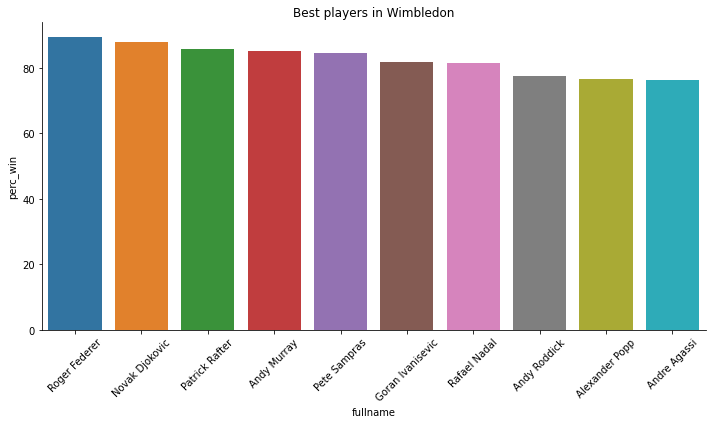

In [33]:
g=sns.catplot(x='fullname', y='perc_win', data=top_wim, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_wim.fullname,  rotation=45)
plot.title('Best players in Wimbledon')

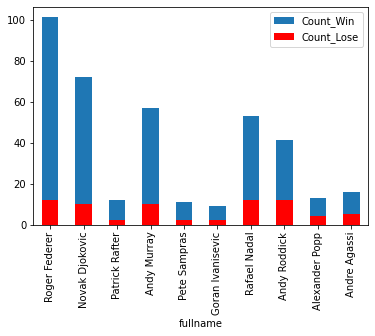

In [34]:
ax = plot.gca()
top_wim.plot(x='fullname',y='Count_Win',kind='bar',ax=ax)
top_wim.plot(x='fullname',y='Count_Lose',kind='bar',color = 'red',ax=ax)
top_wim_win_lose = top_wim.copy()

